# Prediction of Singapore HDB Resale Price based on Governmental Data
<hr>
Thomas ten Hacken, Maxime Kayser and Mei-Jun Yeh <br>
CE9010 Introduction to Data Science <br>
Singapore, April 2018
<hr>
## Introduction

Predicting housing prices is an extensive researched topic in economics and data science. Previously conducted studies by [4,5,6,8] showed that a neural network is better performing to predict future value than a multiple regression model. This is especially the case for a "true" open market [4]. This is contradicted by [7], who argue that results from neural networks vary widely, while traditional regression models are more consistent. Besides predicting prices based on features, novel prediction models have been developed. For example, a price prediction model that looks at the $#$ of searches on Google [9]. Although the researchers found that searches and housing prices are correlated, it is difficult to predict the housing price of a specific building and its characteristics.

Studies conducted often work with an extensive list of variables, including features of the house, but also from the environment and the amenities. For example, [10] use variables such as size (in square meters) and age, but also the presence of a garage or swimming pool. 

### Characteristics of the HDB Property Market
In Singapore, a distinction can be made between two types of properties: a private residential market and a market that is managed by the Housing and Development Board (HDB), which is part of the Ministry of National Development [2]. The flats developed in the HDB market are heavily subsidized by the Singaporean government, and are affordable alternatives for Singaporean residents.

The market for HDB properties differs from the private residential market in several ways. Firstly, the properties are leased to the residents. This lease period is typically 99 years. After the period, the property ownership rights are again in the hands of HDB. Thus, the owner of an HDB apartment is simply leasing it for an extensive amount of time. This differs from renting, since in that case the tenant needs to pay monthly based on actual market conditions [3]. Besides the lease, the owner can be eligible to rent out or sell the flat during the lease period. This created a new market, bla bla...

A previous study conducted in the private residential market [11] shows variables being used in their predictive model. This includes dummy variables for a total of 15 facilities, ranging from swimming pool to security and gyms. The study also took into account unit characteristics, such as size, age and floor level. HDB flats do not have additional facilities, but have similar unit characteristics. The model also takes into account the distance to strategic positions, such as MRT stations and schools.


### Research Objective

Since the market is monitored by the Singaporean government, it can be considered as not truly open. Therefore, based on previous research, a regression model might be sufficient. This research aims to validate if a regression model is sufficient for predicting housing prices in the HDB resale market. The HDB resale data from the Singaporean government, spanning from 1990 until January 2018, is used to develop the model.

After merging the data, we explore the data, then clean and preprocess the data and finally train the data to predict the test data. 

## Libraries
<hr>
The libraries used are pandas, numpy, seaborn, Counter, matplotlib, axes3d, linearregression.

In [100]:
#data analysis
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import sklearn
from collections import Counter

#visualization
%matplotlib inline 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png2x','pdf')
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from IPython.display import IFrame

# machine learning library
from sklearn import datasets, linear_model, cross_validation
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

## 1 Data Acquisition
<hr>
The data for this report is acquired from the Singapore government website [1]. Data are collected from the period 1990 until January 2018. The data is provided in four seperate files, which will be merged into Python. The third file (> 20 MB) was seperated into periods of 2006-2012 and 2012-2014. This was necessary to make use of the Github repository.

In [57]:
#load dataset
data1 = pd.read_csv('sg-resale-flat-prices-1990-1999.csv', sep =',')
print('Number of training data =', data1.shape)

data2 = pd.read_csv('sg-resale-flat-prices-2000-2005.csv', sep =',')
print('Number of training data =', data2.shape)

data3 = pd.read_csv('sg-resale-flat-prices-2006-2012.csv', sep =',')
print('Number of training data =', data3.shape)

data4 = pd.read_csv('sg-resale-flat-prices-2012-2014.csv', sep =',')
print('Number of training data =', data4.shape)

data5 = pd.read_csv('sg-resale-flat-prices-2014-2018.csv', sep =',')
print('Number of training data =', data5.shape)

Number of training data = (288144, 10)
Number of training data = (197175, 10)
Number of training data = (172476, 10)
Number of training data = (52203, 10)
Number of training data = (58631, 11)


Following the shape of the data, there is a noticable difference from the last dataset. To discover which variable has been added to the dataset, we recall the first two features from both the first and the last dataset. 

In [58]:
#show features of data set 1
data1.head(5)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200


In [59]:
#show features of data set 5
data5.tail(5)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
58626,2018-01,YISHUN,5 ROOM,760,YISHUN ST 72,07 TO 09,122.0,Improved,1987,68,490000.0
58627,2018-01,YISHUN,5 ROOM,876,YISHUN ST 81,04 TO 06,121.0,Improved,1987,69,468000.0
58628,2018-01,YISHUN,EXECUTIVE,792,YISHUN RING RD,07 TO 09,146.0,Maisonette,1987,68,555000.0
58629,2018-01,YISHUN,EXECUTIVE,387,YISHUN RING RD,04 TO 06,146.0,Maisonette,1988,69,550000.0
58630,2018-01,YISHUN,EXECUTIVE,277,YISHUN ST 22,07 TO 09,146.0,Maisonette,1985,66,545000.0


By comparing the two data sets, we can see that the extra feature is the remaining lease year of the HBD housing. In Singapore, the lease of the HBD housing starts with 99 years. In the 99 years, the appartment can be resold to someone else, but this does not mean that 99 years will be refreshed. The number of years the previous owner has lived in the appartment will be substracted instead. After the remaining lease year, the current owner will have to move [source]. We believe this is an important feature to consider in the predictive model. Therefore, we will recalculate the row for the other data sets as well during the preprocessing stage. <br>

However, before the preprocessing stage, exploration will be done to figure out other possible changes. To continue with the exploration, the data should be merged. To merge the data, the datasets should consist of the same number of features. Therefore, the remaining lease variable will be removed first.

In [60]:
data5 = data5.drop('remaining_lease',1)
print('Number of training data =', data5.shape)

Number of training data = (58631, 10)


In [61]:
data5.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,290000.0


(Exploration - Check Storey Range) Since the storey range is ranging differently at a certain point. We are checking in which dataset(s) this is happening.

In [62]:
print(np.unique(data1['storey_range']))
print(np.unique(data2['storey_range']))
print(np.unique(data3['storey_range']))
print(np.unique(data4['storey_range']))
print(np.unique(data5['storey_range']))

['01 TO 03' '04 TO 06' '07 TO 09' '10 TO 12' '13 TO 15' '16 TO 18'
 '19 TO 21' '22 TO 24' '25 TO 27']
['01 TO 03' '04 TO 06' '07 TO 09' '10 TO 12' '13 TO 15' '16 TO 18'
 '19 TO 21' '22 TO 24' '25 TO 27' '28 TO 30']
['01 TO 03' '04 TO 06' '07 TO 09' '10 TO 12' '13 TO 15' '16 TO 18'
 '19 TO 21' '22 TO 24' '25 TO 27' '28 TO 30' '31 TO 33' '34 TO 36'
 '37 TO 39' '40 TO 42']
['01 TO 03' '01 TO 05' '04 TO 06' '06 TO 10' '07 TO 09' '10 TO 12'
 '11 TO 15' '13 TO 15' '16 TO 18' '16 TO 20' '19 TO 21' '21 TO 25'
 '22 TO 24' '25 TO 27' '26 TO 30' '28 TO 30' '31 TO 33' '31 TO 35'
 '34 TO 36' '36 TO 40' '37 TO 39' '40 TO 42']
['01 TO 03' '04 TO 06' '07 TO 09' '10 TO 12' '13 TO 15' '16 TO 18'
 '19 TO 21' '22 TO 24' '25 TO 27' '28 TO 30' '31 TO 33' '34 TO 36'
 '37 TO 39' '40 TO 42' '43 TO 45' '46 TO 48' '49 TO 51']


### 1.1 Merge Datasets
Since the data are divided into five datasets, we want to merge the data for further exploration. To do this, the concatenation is used from pandas.

In [63]:
#concatenate dataset
sets = [data1, data2, data3, data4, data5]
data = pd.concat(sets)
print('Number of training data =', data.shape)


Number of training data = (768629, 10)


## 2 Exploration of the Dataset
<hr>

### 2.1 Data description and information

In [64]:
#load dataset
n = data.shape[0]
print('Number of training data:',n)
print('Our data has',data.shape[1],'features.')

Number of training data: 768629
Our data has 10 features.


We use data.describe() to have a look at some key metrics of the data set.

In [65]:
print(data.describe())

       floor_area_sqm  lease_commence_date  resale_price
count   768629.000000        768629.000000  7.686290e+05
mean        95.455564          1986.563476  2.823196e+05
std         26.210450             8.851260  1.424499e+05
min         28.000000          1966.000000  5.000000e+03
25%         72.000000          1980.000000  1.750000e+05
50%         93.000000          1985.000000  2.650000e+05
75%        114.000000          1993.000000  3.700000e+05
max        307.000000          2015.000000  1.180000e+06


We can conclude:
- All appartments vary between the size of 26.2 and 307 sqm. The median is 95.3 sqm.
- The oldest lease start date is 1996 and the oldest one is 2012. Thus no appartment in this list has a lease that expires before 2066. The mean lease start date is 1987. 
- Resale prices vary between 5000 SGD and 1.18 million SGD. It has to be verified if a price of 5000SGD is possible or is due to faulty data. The median price lies at 260k SGD.
- Overall, at a first glance the dataset seems to be clean and free of faulty datapoints. <br>

Let's have a look at the data types:

In [66]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768629 entries, 0 to 58630
Data columns (total 10 columns):
month                  768629 non-null object
town                   768629 non-null object
flat_type              768629 non-null object
block                  768629 non-null object
street_name            768629 non-null object
storey_range           768629 non-null object
floor_area_sqm         768629 non-null float64
flat_model             768629 non-null object
lease_commence_date    768629 non-null int64
resale_price           768629 non-null float64
dtypes: float64(2), int64(1), object(7)
memory usage: 64.5+ MB
None


We can see that the data list is complete, as all features have 768,629 values. <br>

After loading the data, the data are explored. Features are checked to see whether cleaning and preprocessing of the data is needed.

## 2.2 Univariate plots

#### 2.2.1 Time of Sale

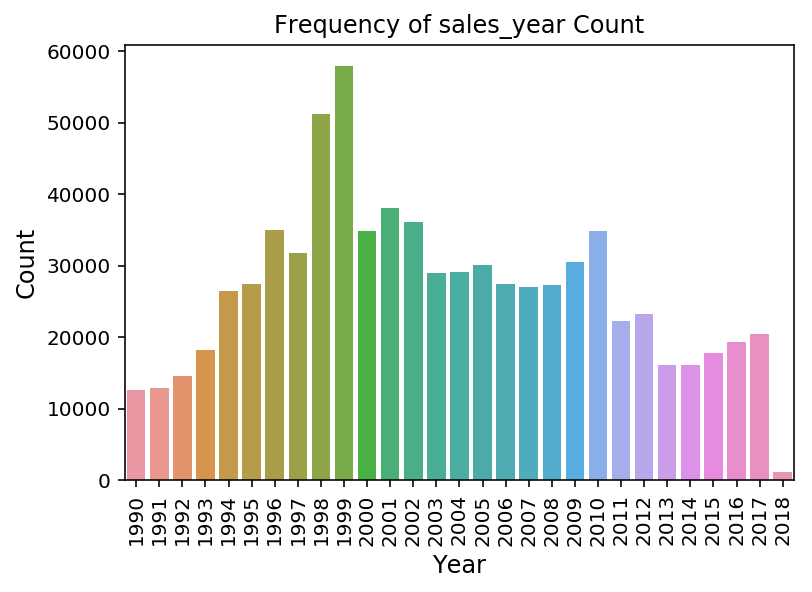

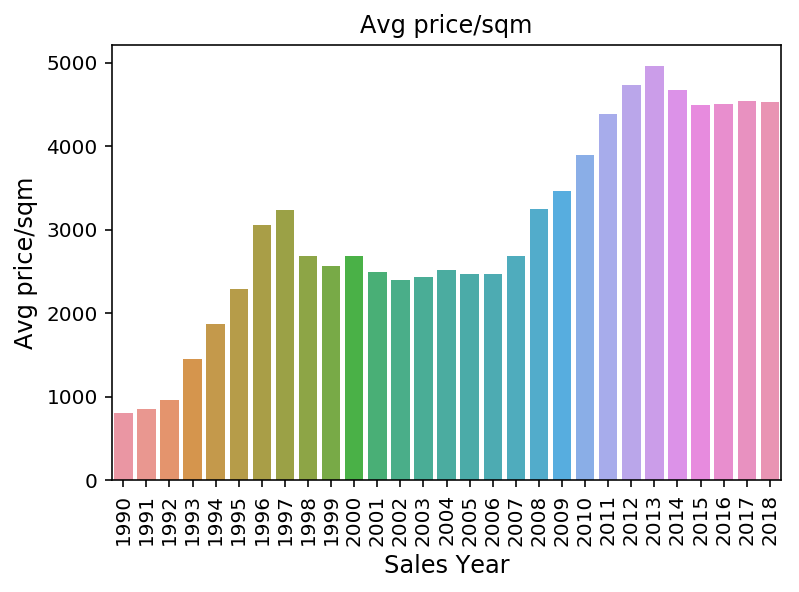

In [67]:
#yearly sales trend

sales_year = np.unique(pd.DatetimeIndex(data['month']).year.values)
year_count=pd.DatetimeIndex(data['month']).year.value_counts()

sns.barplot(year_count.index, year_count.values, order=sales_year)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of sales_year Count", fontsize=12)
plt.show()
#sales_year_count = (pd.DatetimeIndex(data['month']).year).value_counts()
#print("Sales Year Count \n" +str(sales_year_count))

#sales year vs avg price/sqm
n = len(sales_year)
avg_price = np.zeros(n)

for i in range(0,n):
        price = data['resale_price'][pd.DatetimeIndex(data['month']).year == sales_year[i]].sum()
        sqmm = data['floor_area_sqm'][pd.DatetimeIndex(data['month']).year == sales_year[i]].sum()
        priceSQM = price/sqmm
        avg_price[i] = priceSQM
        
sns.barplot(sales_year,avg_price)
plt.ylabel('Avg price/sqm', fontsize=12)
plt.xlabel('Sales Year', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Avg price/sqm", fontsize=12)
plt.show()

Observations:
- In our dataset, sales rose between 1990 and 1999 and then continuously dropped to around 20,000 in 2017.
- 2018 is included in the dataset, but only seems to contain a marginal amount of sales.
- As expected, in general, prices per sqm increase over time.
- However there was a dip after 1997 and after 2013.

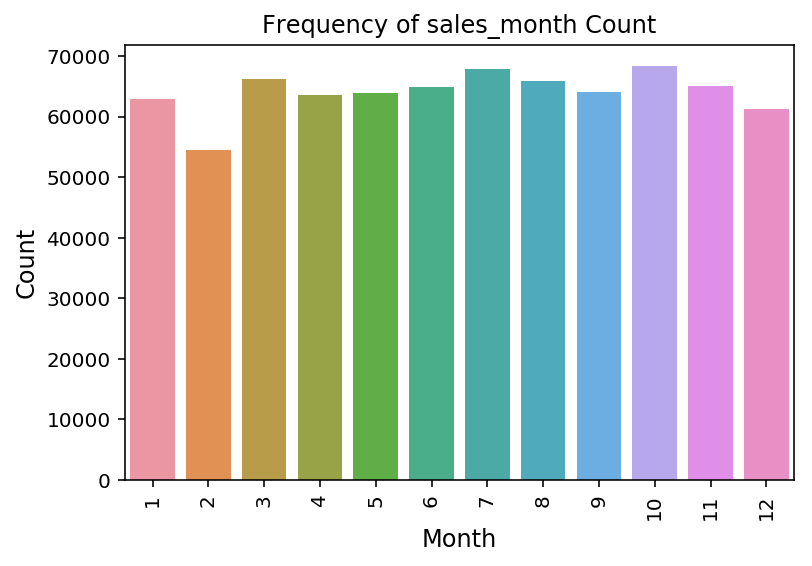

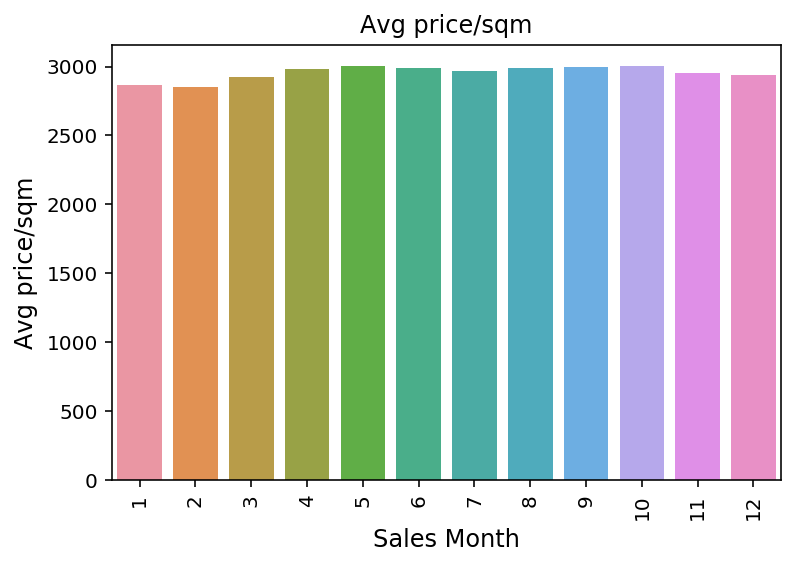

In [68]:
#monthly sales trend

sales_month = np.unique(pd.DatetimeIndex(data['month']).month.values)
month_count=pd.DatetimeIndex(data['month']).month.value_counts()

sns.barplot(month_count.index, month_count.values, order=sales_month)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of sales_month Count", fontsize=12)
plt.show()
#sales_month_count = (pd.DatetimeIndex(data['month']).month).value_counts()
#print("Sales Month Count \n" +str(sales_month_count))

#sales month vs avg price/sqm
n = len(sales_month)
avg_price = np.zeros(n)

for i in range(0,n):
        price = data['resale_price'][pd.DatetimeIndex(data['month']).month == sales_month[i]].sum()
        sqmm = data['floor_area_sqm'][pd.DatetimeIndex(data['month']).month == sales_month[i]].sum()
        priceSQM = price/sqmm
        avg_price[i] = priceSQM
        
sns.barplot(sales_month,avg_price)
plt.ylabel('Avg price/sqm', fontsize=12)
plt.xlabel('Sales Month', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Avg price/sqm", fontsize=12)
plt.show()

Observations:
- It seems like the last and first month of a year have slightly lower prices than the middle months. <br>

#### 2.2.2 Feature: Lease Commencement Year

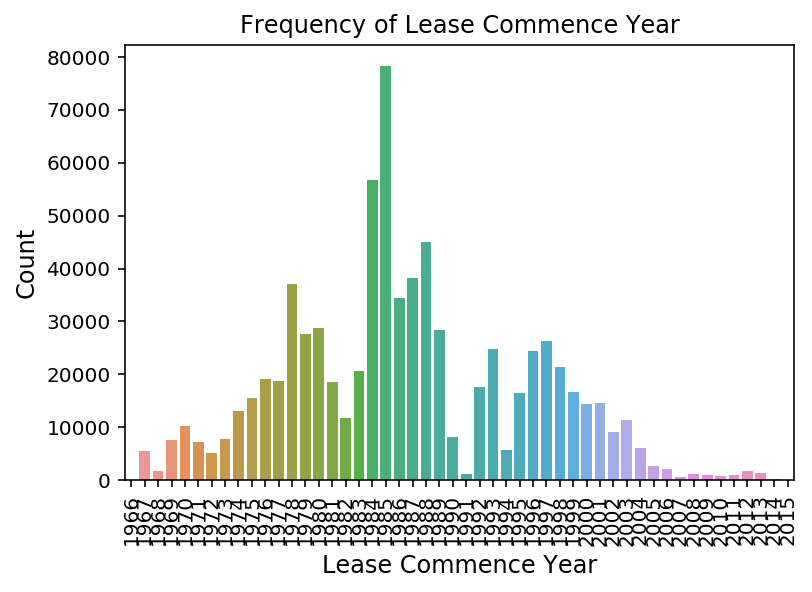

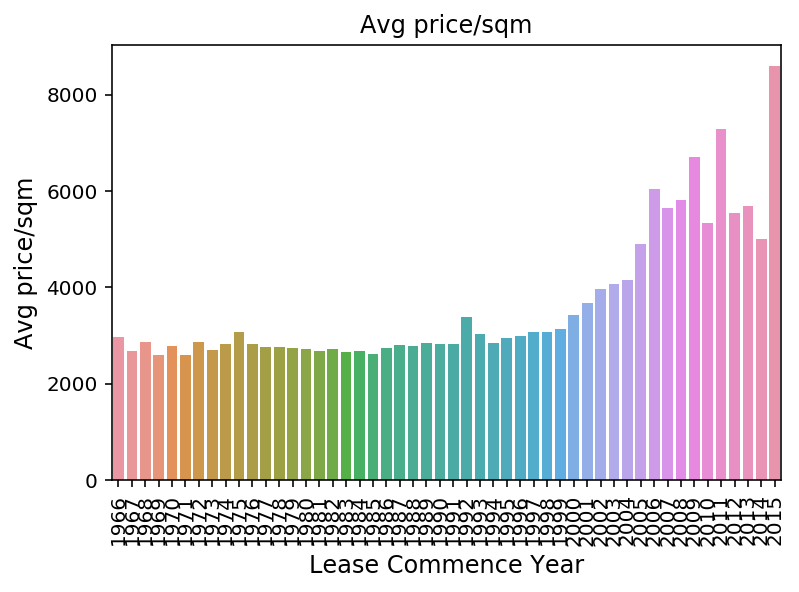

In [69]:
#lease commencement year

lease_commence = np.unique(data['lease_commence_date'])

sns.countplot(x="lease_commence_date", data=data , order = lease_commence)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Lease Commence Year', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Lease Commence Year", fontsize=12)
plt.show()
#lease_commence_count = data['lease_commence_date'].value_counts()
#print("Lease Commence Count \n" +str(lease_commence_count))

#town vs avg price/sqm
n = len(lease_commence)
avg_price = np.zeros(n)

for i in range(0,n):
        price = data['resale_price'][data['lease_commence_date'] == lease_commence[i]].sum()
        sqmm = data['floor_area_sqm'][data['lease_commence_date'] == lease_commence[i]].sum()
        priceSQM = price/sqmm
        avg_price[i] = priceSQM
        
sns.barplot(lease_commence,avg_price)
plt.ylabel('Avg price/sqm', fontsize=12)
plt.xlabel('Lease Commence Year', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Avg price/sqm", fontsize=12)
plt.show()

Observations:
- The years 1984-1990 have the most commencement dates. Before, there is an ongoing increase and afterwards an ongoing decrease.
- Prices/sqm remain relatively flat for commencement dates from 1966 to 2000 and increase from 2000 to 2012. After 2012 the prices decrease heavily and in 2015, it almost doubled again. <br>


#### 2.2.3 Feature: Town

Total Town Count: 27


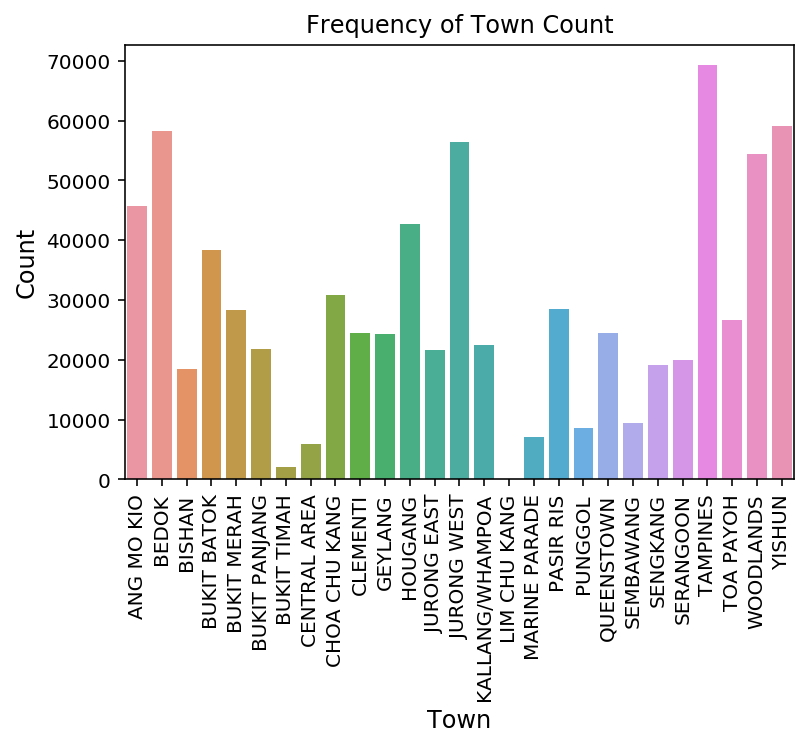

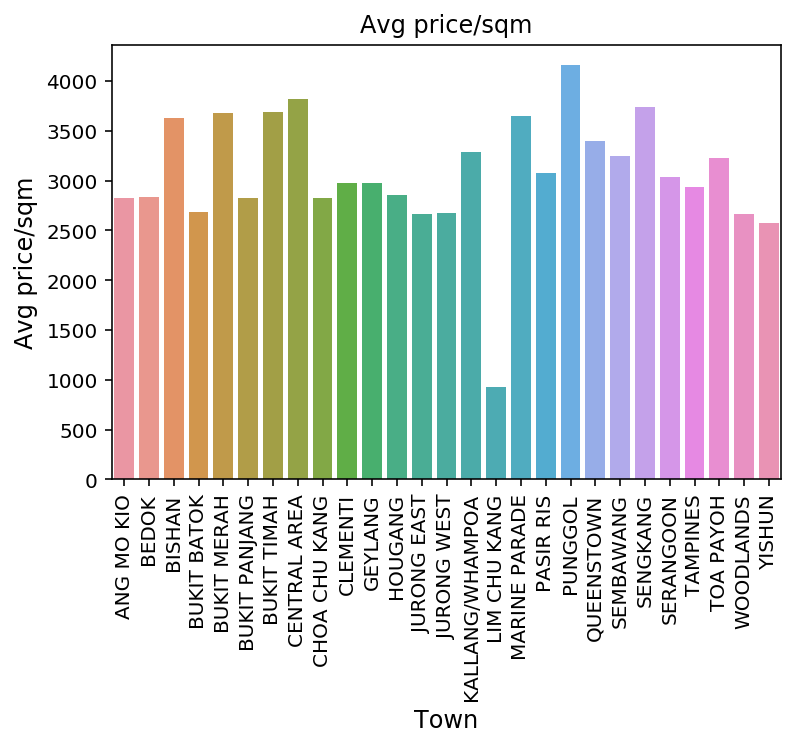

In [70]:
#town count
count_towns = data['town'].nunique()
print("Total Town Count:", count_towns)

town = np.unique(data['town'])

sns.countplot(x="town", data=data , order = town)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Town', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Town Count", fontsize=12)
plt.show()
#towns_count = data['town'].value_counts()
#print("Town Count \n" +str(towns_count))

#town vs avg price/sqm
n = len(town)
avg_price = np.zeros(n)

for i in range(0,n):
        price = data['resale_price'][data['town'] == town[i]].sum()
        sqmm = data['floor_area_sqm'][data['town'] == town[i]].sum()
        priceSQM = price/sqmm
        avg_price[i] = priceSQM
        
sns.barplot(town,avg_price)
plt.ylabel('Avg price/sqm', fontsize=12)
plt.xlabel('Town', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Avg price/sqm", fontsize=12)
plt.show()

Observations:
- Besides Bukit Timah and Lim Chu Kang, all towns have more than 5000 sales occurrences.
- TAMPINES is the most present town, with 69236 sales.
- Lim Chu Kang is a clear outlier in terms of price/sqm. This is probably correlated to the low number of only 64 sales registered in that area.
- The most expensive town is Punggol. 

### Singaporean Townships and Areas
The Housing and Development Board makes a distinction between a total of 23 townships, located in 5 different areas [12]. The areas define their location within the city-state, whereas the township concatenates a community with its own council. The map below highlights the areas and townships. The areas are respectively: north (red), nort-east (yellow), east (blue), central (brown) and west (green). The pins indicate the townships included.

In [71]:
IFrame('https://www.google.com/maps/d/u/0/embed?mid=1Gv4-kVYanSXMj8Q2ldJKJkzTilOlEZxL', width=800, height=300)

#### 2.2.4 Feature: Flat Type

Total Flat Type Count: 8


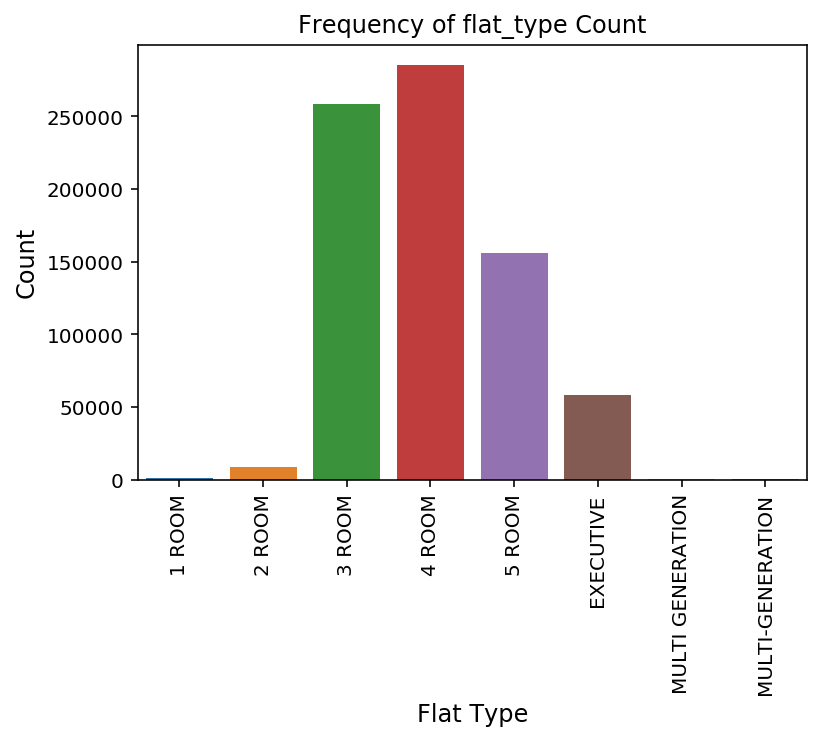

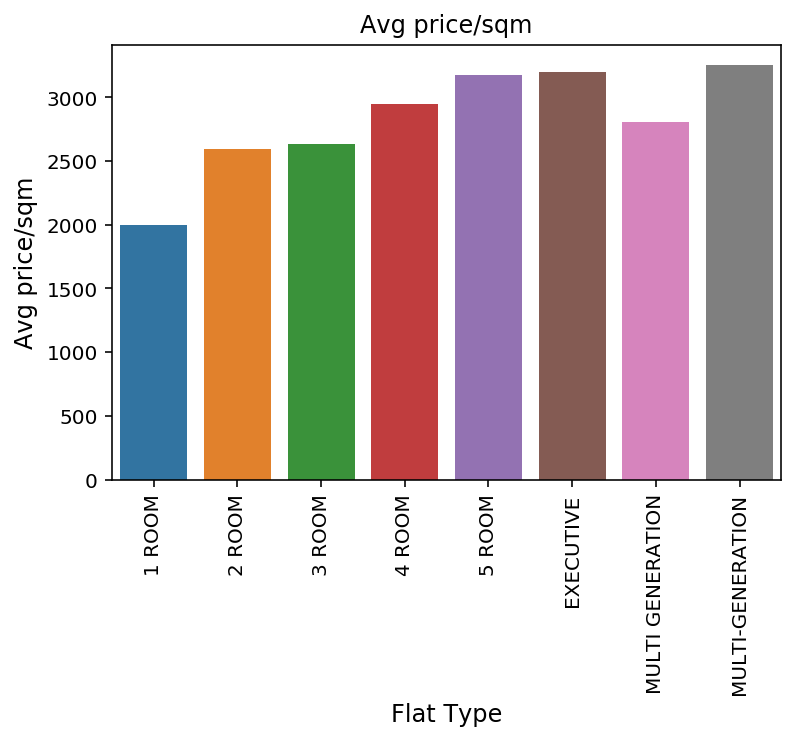

In [72]:
#flat_type count
count_flat_type = data['flat_type'].nunique()
print("Total Flat Type Count:", count_flat_type)
#flat_type_count = data['flat_type'].value_counts()
#print("Flat Type Count \n" +str(flat_type_count))

flat_type = np.unique(data['flat_type'])

sns.countplot(x="flat_type", data=data , order = flat_type)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Flat Type', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of flat_type Count", fontsize=12)
plt.show()

#flat type vs avg price/sqm
n = len(flat_type)
avg_price = np.zeros(n)

for i in range(0,n):
        price = data['resale_price'][data['flat_type'] == flat_type[i]].sum()
        sqmm = data['floor_area_sqm'][data['flat_type'] == flat_type[i]].sum()
        priceSQM = price/sqmm
        avg_price[i] = priceSQM
        
sns.barplot(flat_type,avg_price)
plt.ylabel('Avg price/sqm', fontsize=12)
plt.xlabel('Flat Type', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Avg price/sqm", fontsize=12)
plt.show()

Observations:
- 1 Room, 2 Room, and Multi-Generations are clearly fewer than the remaining flat types.
- The most common flat type is 4 rooms.
- Prices per sqm, surprisingly, seem to up with flat size. <br>

#### 2.2.5 Feature: Flat Model

Total Flat Model Count: 34


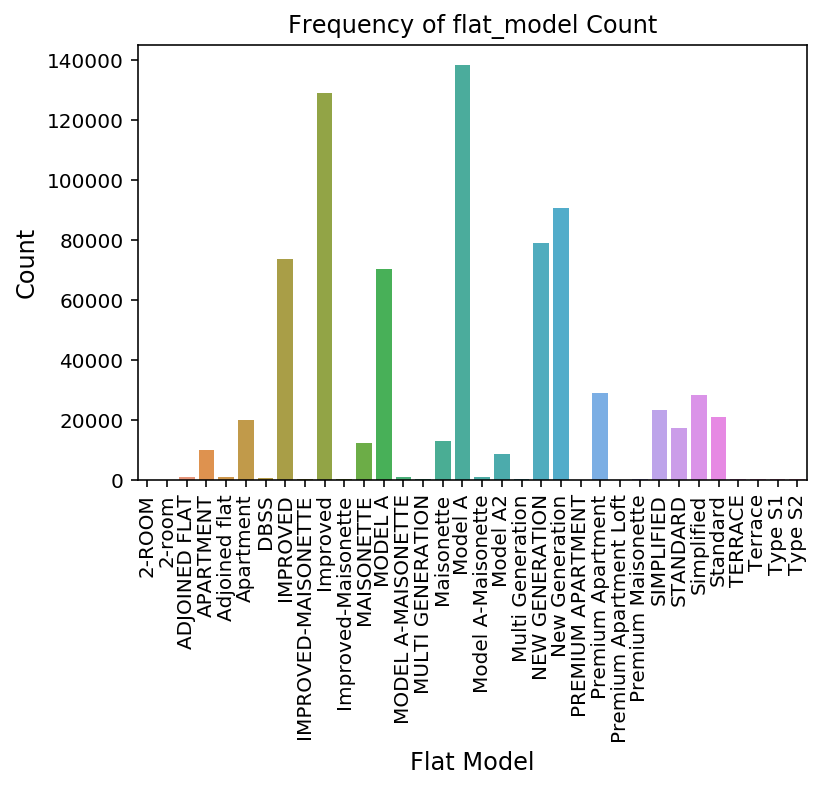

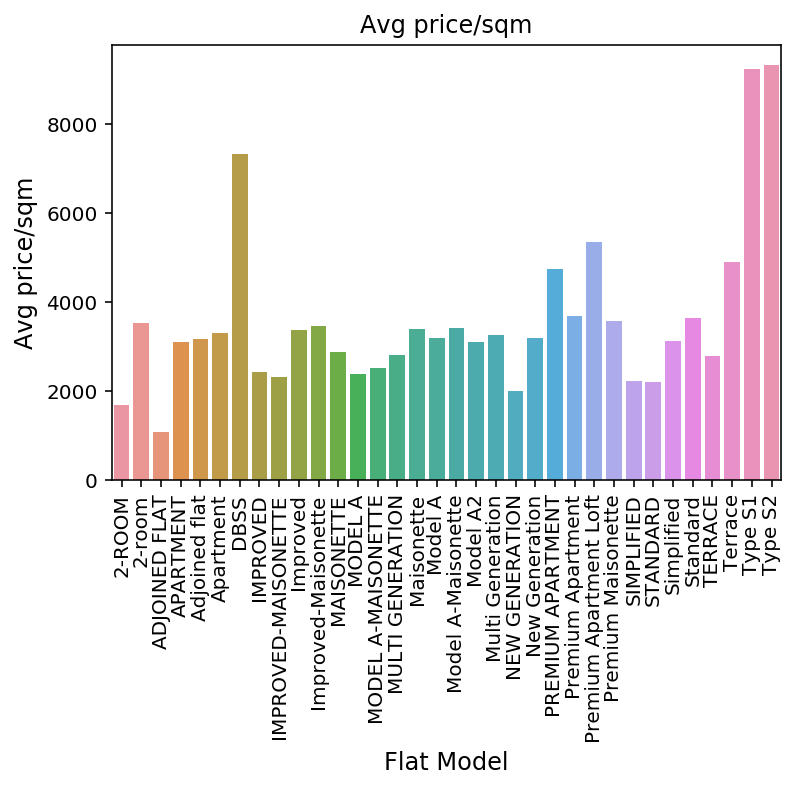

In [73]:
#flat_model count
count_flat_model = data['flat_model'].nunique()
print("Total Flat Model Count:", count_flat_model)
#flat_model_count = data['flat_model'].value_counts()
#print("Flat Model Count \n" +str(flat_model_count))

flat_model = np.unique(data['flat_model'])

sns.countplot(x="flat_model", data=data , order = flat_model)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Flat Model', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of flat_model Count", fontsize=12)
plt.show()

#flat model vs avg price/sqm
n = len(flat_model)
avg_price = np.zeros(n)

for i in range(0,n):
        price = data['resale_price'][data['flat_model'] == flat_model[i]].sum()
        sqmm = data['floor_area_sqm'][data['flat_model'] == flat_model[i]].sum()
        priceSQM = price/sqmm
        avg_price[i] = priceSQM
        
sns.barplot(flat_model,avg_price)
plt.ylabel('Avg price/sqm', fontsize=12)
plt.xlabel('Flat Model', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Avg price/sqm", fontsize=12)
plt.show()

Obersvations:
- Concerning flat_models, there are lot of flat_models that exist less than a 1000 times.
- The most common ones are 'Model A' and 'Improved'.
- Prices/sqm vary widely, which is probably due to some sample sizes being very small. <br>

#### 2.2.6 Feature: Storey Range

Total Storey Range Count: 25


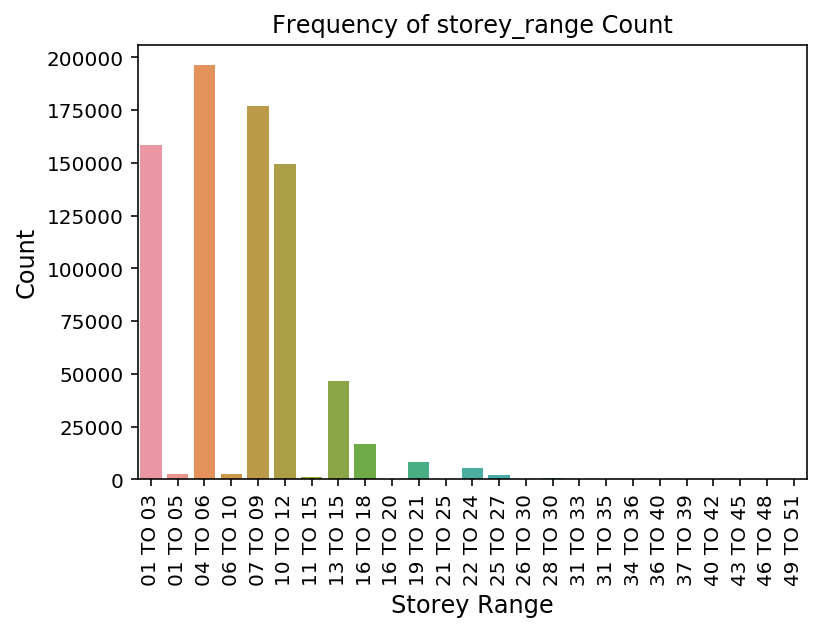

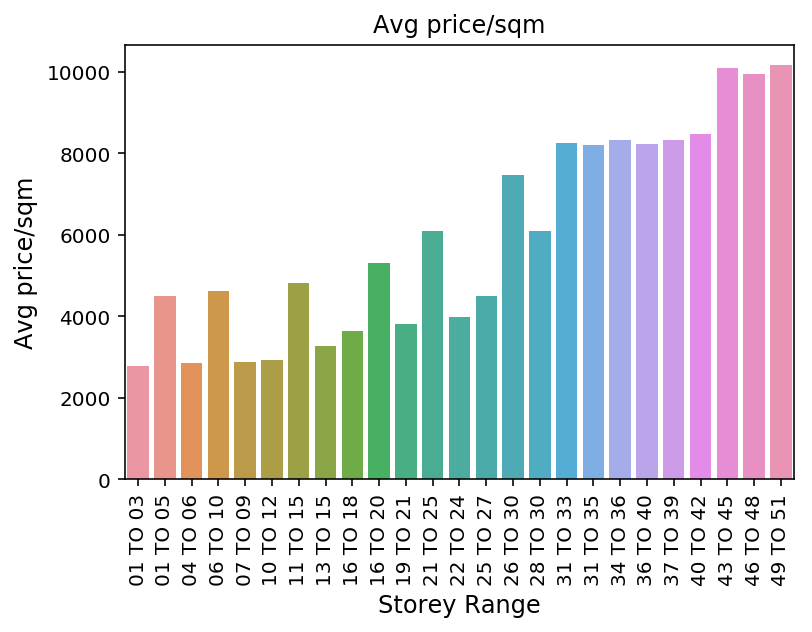

In [74]:
#storey range count
count_storey_range = data['storey_range'].nunique()
print("Total Storey Range Count:", count_storey_range)
#storey_range_count = data['storey_range'].value_counts()
#print("Storey Range Count \n" +str(storey_range_count))

storey_array = np.unique(data['storey_range'])

sns.countplot(x="storey_range", data=data , order = storey_array)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Storey Range', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of storey_range Count", fontsize=12)
plt.show()

#storey range vs avg price/sqm
n = len(storey_array)
avg_price = np.zeros(n)

for i in range(0,n):
        price = data['resale_price'][data['storey_range'] == storey_array[i]].sum()
        sqmm = data['floor_area_sqm'][data['storey_range'] == storey_array[i]].sum()
        priceSQM = price/sqmm
        avg_price[i] = priceSQM
        
sns.barplot(storey_array,avg_price)
plt.ylabel('Avg price/sqm', fontsize=12)
plt.xlabel('Storey Range', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Avg price/sqm", fontsize=12)
plt.show()

Observations:
- There is a clear upwards trend in prices for higher stories.
- There are few storey ranges that spike in price.
- Those ranges also tend to have really low frequency.
- These ranges also tend to be included in other ranges.
- It is possible that e.g. in recent years, which have higher prices, the storey format changed; which would explain higher avg. prices per sqm. <br>

#### 2.2.7 Feature: Squared Meters Distribution

Total SQM Range Count: 209


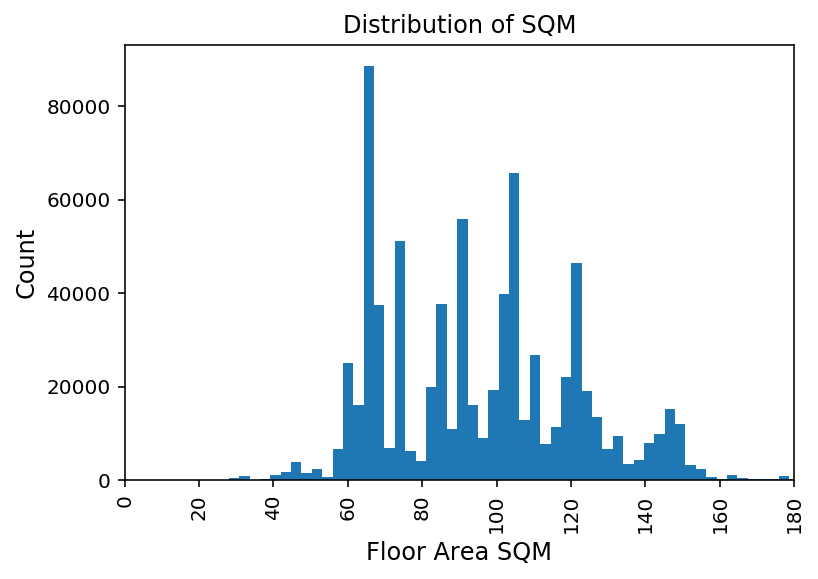

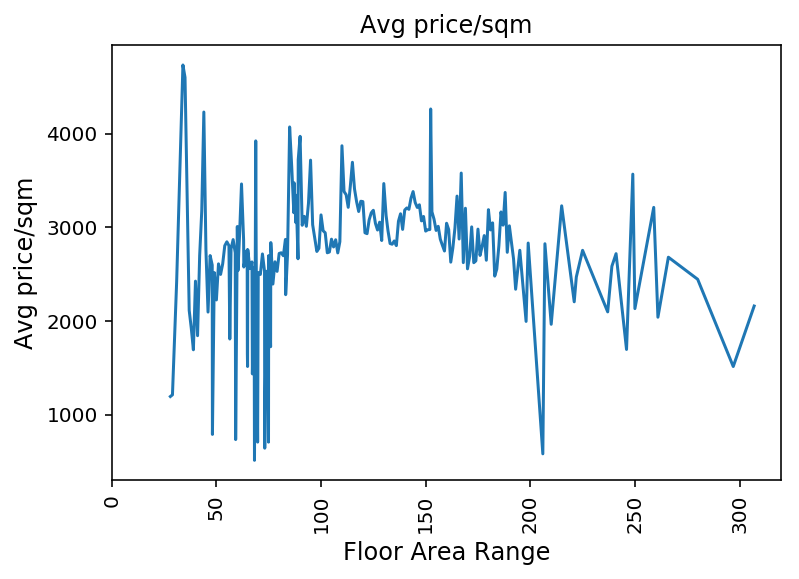

In [75]:
#SQM distribution
count_sqm = data['floor_area_sqm'].nunique()
print("Total SQM Range Count:", count_sqm)
#sqm_count = data['floor_area_sqm'].value_counts()
#print("SQM Range Count \n" +str(sqm_count))

sqm_area = np.unique(data['floor_area_sqm'])

plt.hist(data['floor_area_sqm'], bins = 100)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Floor Area SQM', fontsize=12)
plt.xlim(0,180)
plt.xticks(rotation='vertical')
plt.title("Distribution of SQM", fontsize=12)
plt.show()

#storey range vs avg price/sqm
n = len(sqm_area)
avg_price = np.zeros(n)

for i in range(0,n):
        price = data['resale_price'][data['floor_area_sqm'] == sqm_area[i]].sum()
        sqmm = data['floor_area_sqm'][data['floor_area_sqm'] == sqm_area[i]].sum()
        priceSQM = price/sqmm
        avg_price[i] = priceSQM
        
plt.plot(sqm_area,avg_price)
plt.ylabel('Avg price/sqm', fontsize=12)
plt.xlabel('Floor Area Range', fontsize=12)
plt.xlim(0,320)
plt.xticks(rotation='vertical')
plt.title("Avg price/sqm", fontsize=12)
plt.show()

Observations:
- We can see that the largest chunk of the HBDs are between 25 and 200 sqm.
- There are strong variations of counts between the different bins.
- Prices per sqm seem to be highest in the mid-range of SQM. <br>

#### 2.2.8 Feature: Resale Price

Total Resale Price Range Count: 8082


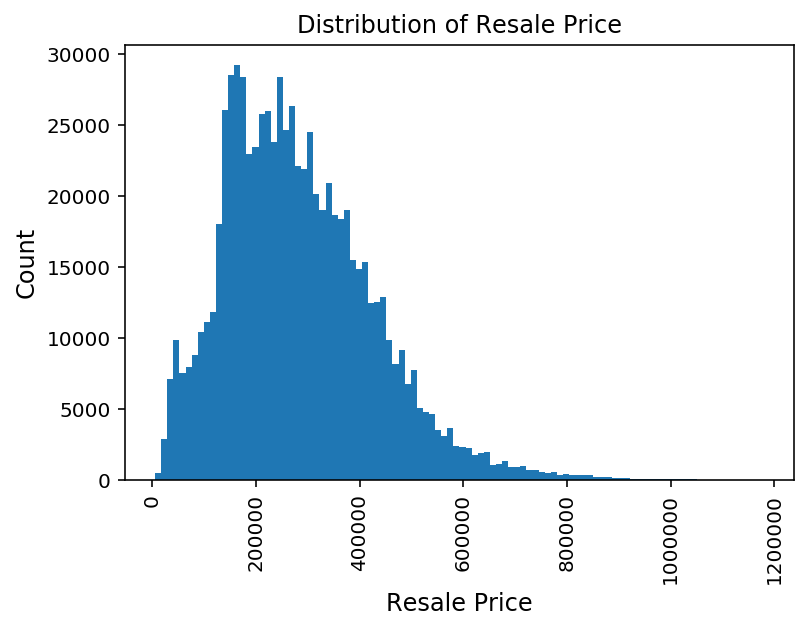

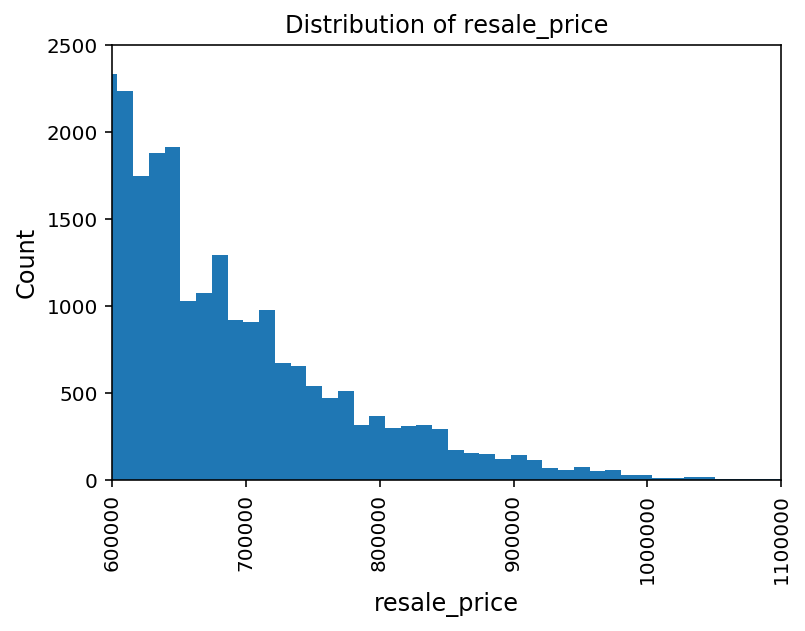

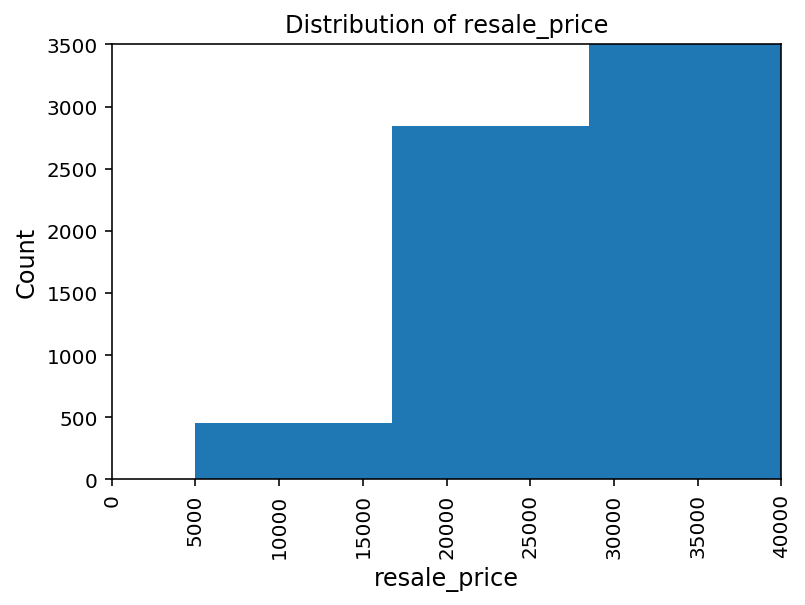

In [76]:
#resale price distribution
count_price = data['resale_price'].nunique()
print("Total Resale Price Range Count:", count_price)
#price_count = data['resale_price'].value_counts()
#print("Resale Price Range Count \n" +str(price_count))

plt.hist(data['resale_price'], bins = 100)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Resale Price', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Distribution of Resale Price", fontsize=12)
plt.show()

#resale prices above $1,000,000
plt.hist(data['resale_price'], bins=100)
plt.ylabel('Count', fontsize=12)
plt.xlabel('resale_price', fontsize=12)
plt.xticks(rotation='vertical')
plt.ylim(0,2500)
plt.xlim(600000,1100000)
plt.title("Distribution of resale_price", fontsize=12)
plt.show()

#resale prices under $10,000
plt.hist(data['resale_price'], bins=100)
plt.ylabel('Count', fontsize=12)
plt.xlabel('resale_price', fontsize=12)
plt.xticks(rotation='vertical')
plt.ylim(0,3500)
plt.xlim(0,40000)
plt.title("Distribution of resale_price", fontsize=12)
plt.show()

Observations:
- Practically no prices per flat go above 1,000,000 SGD.
- The majority of prices are between 150,000 and 400,000 SGD.
- There seems to be a number of flats (400+) that were sold for less than 10,000 SGD. <br>

### 2.3 Correlations

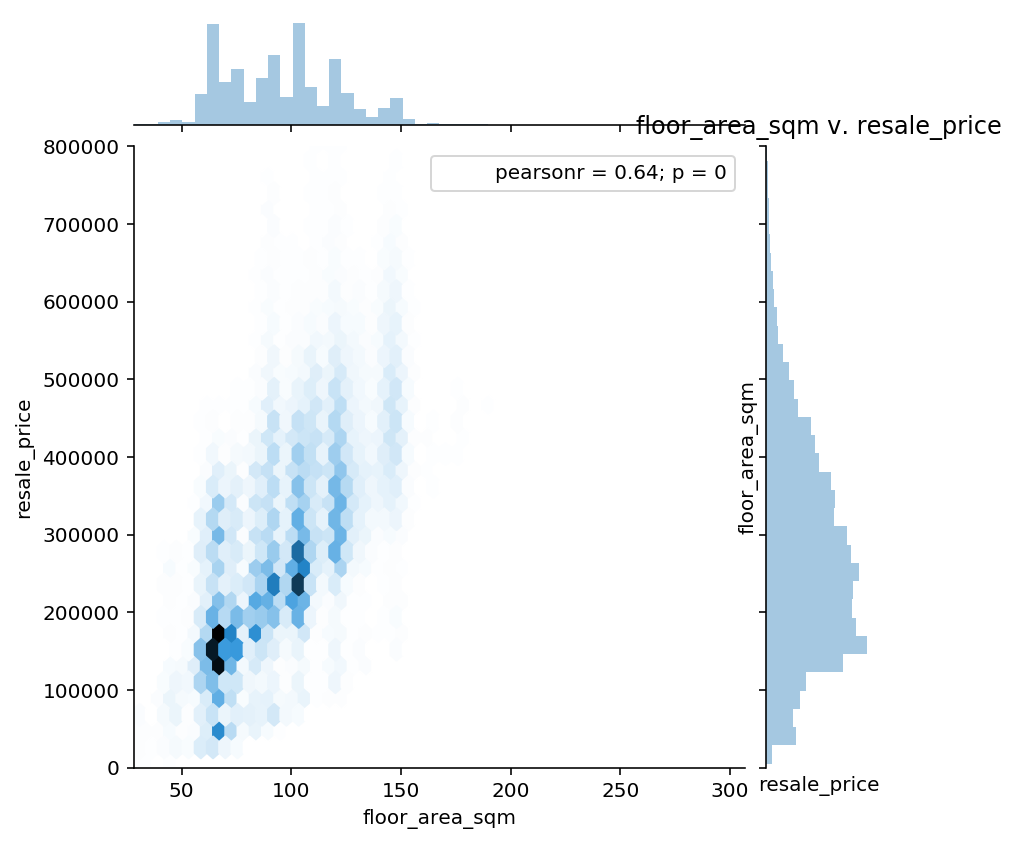

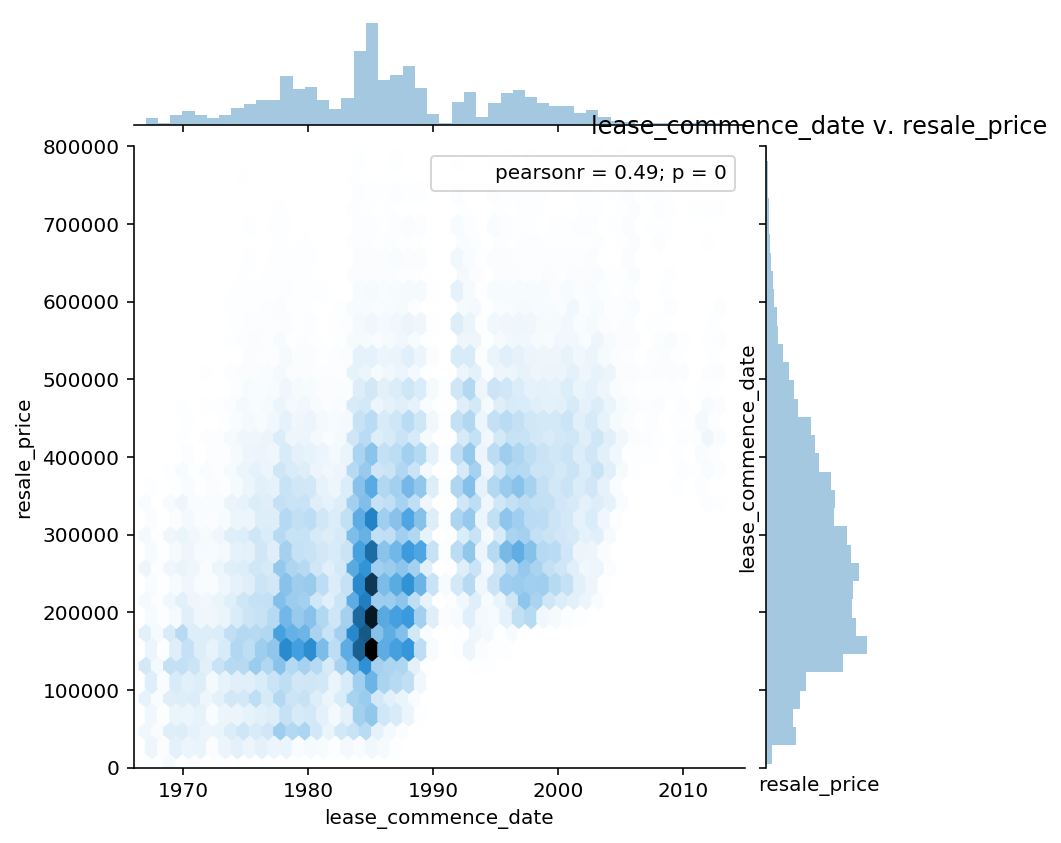

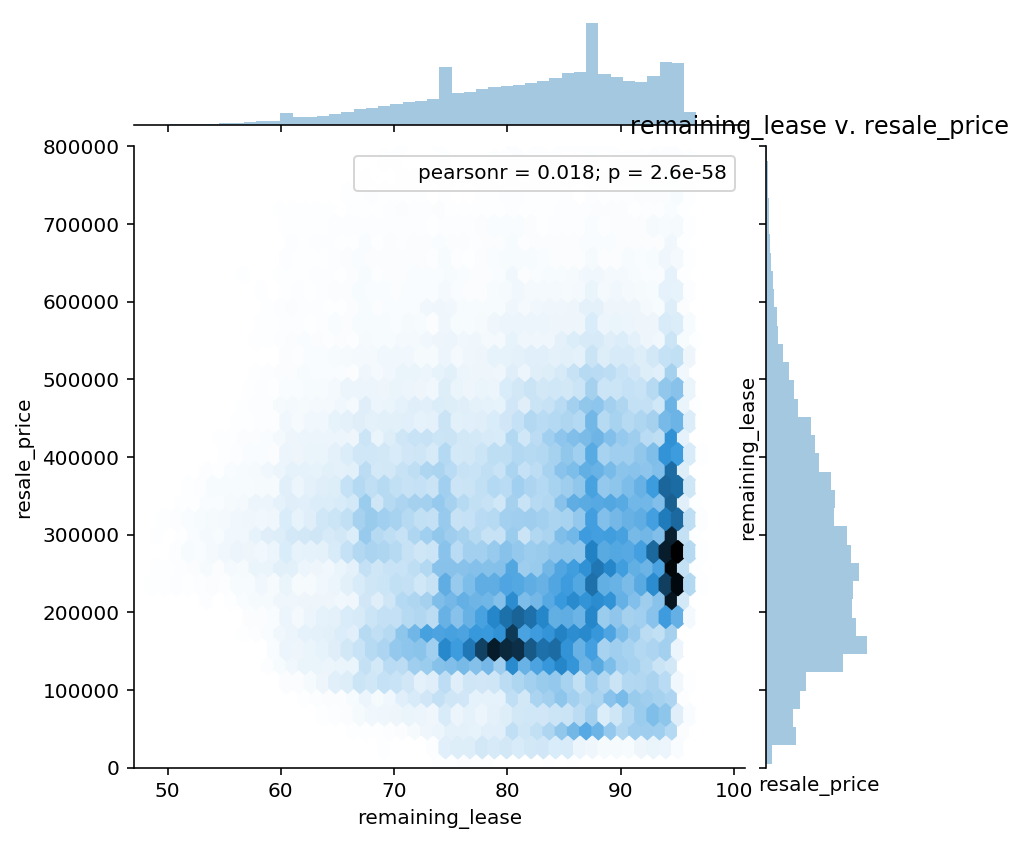

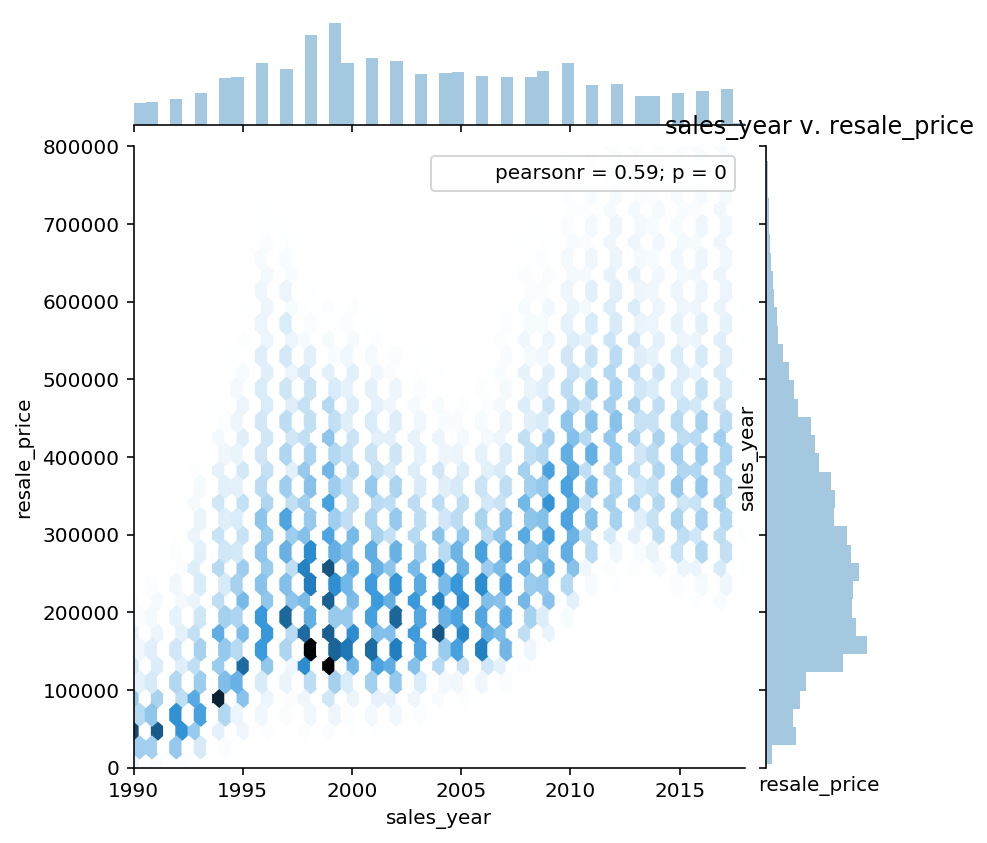

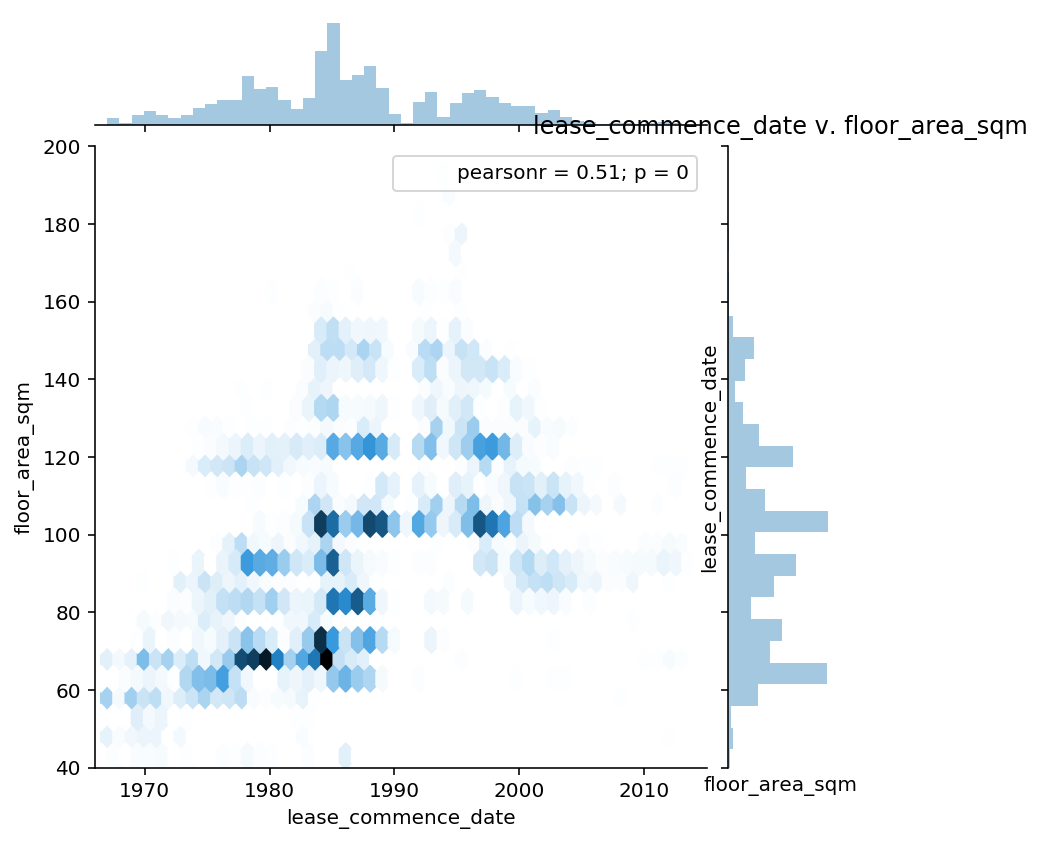

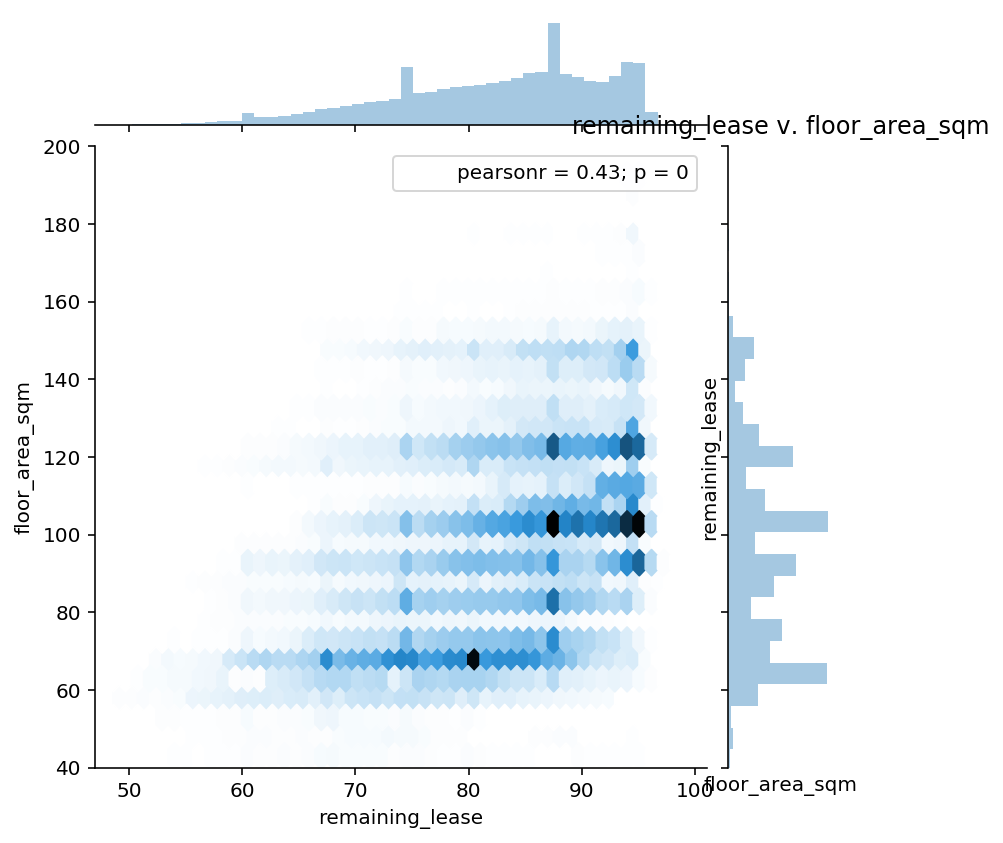

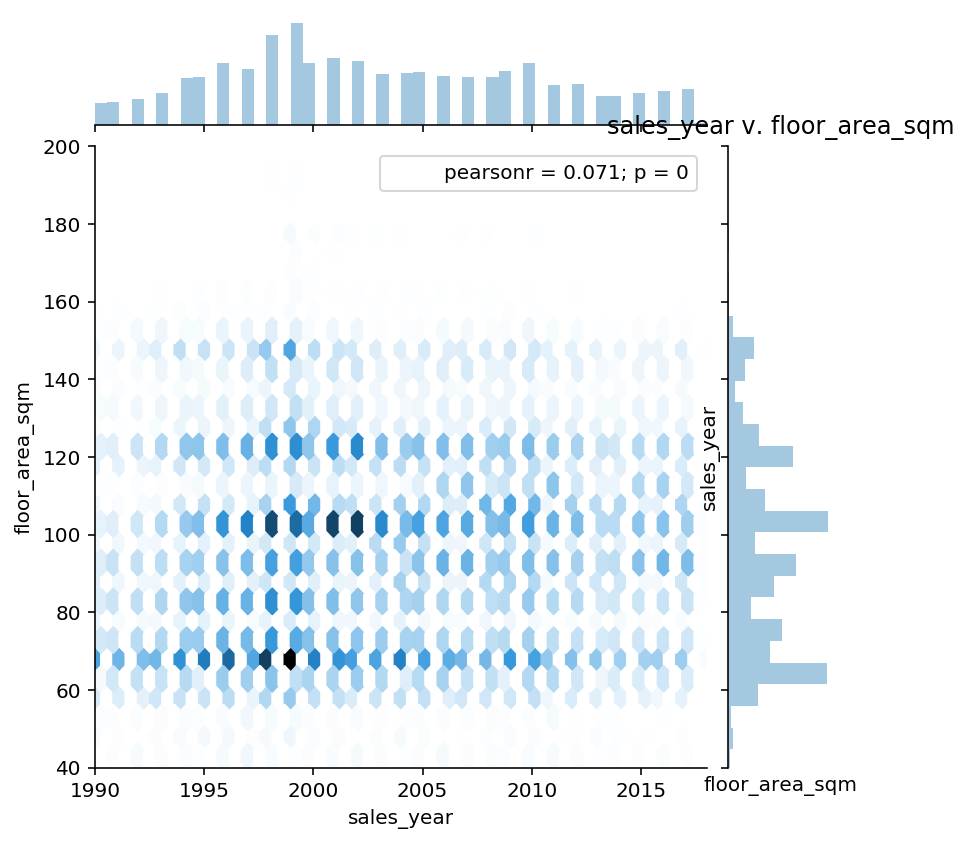

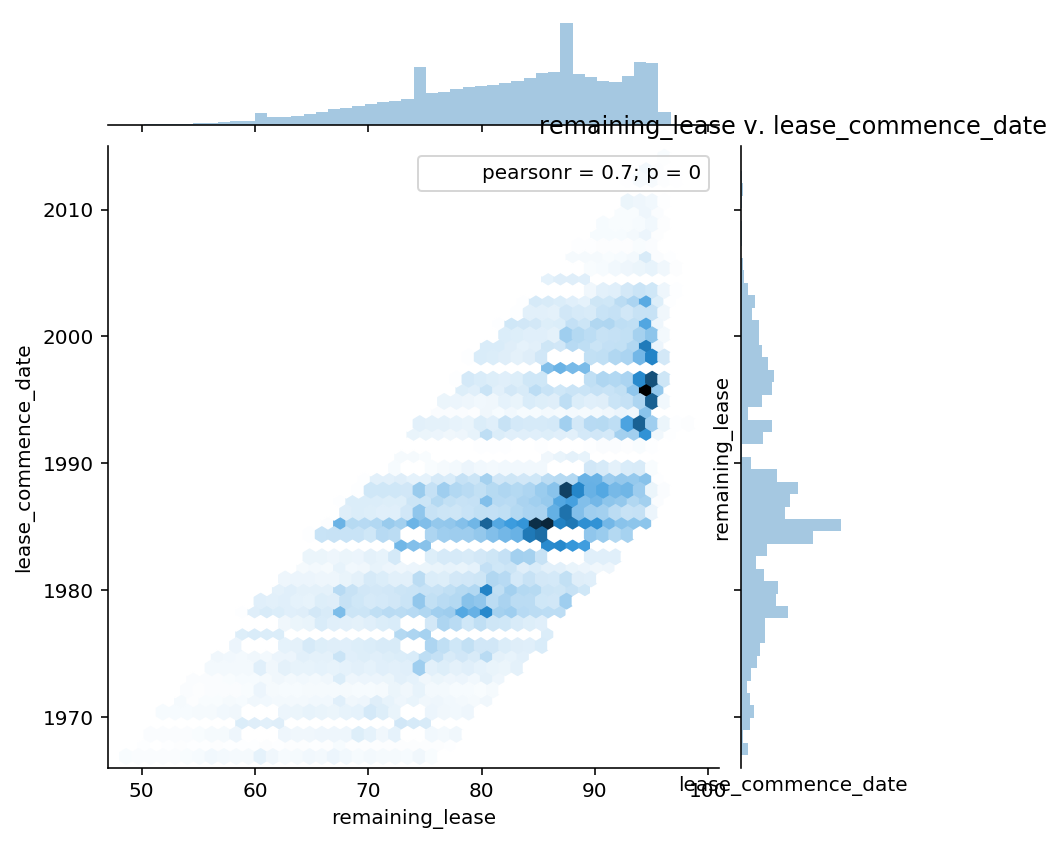

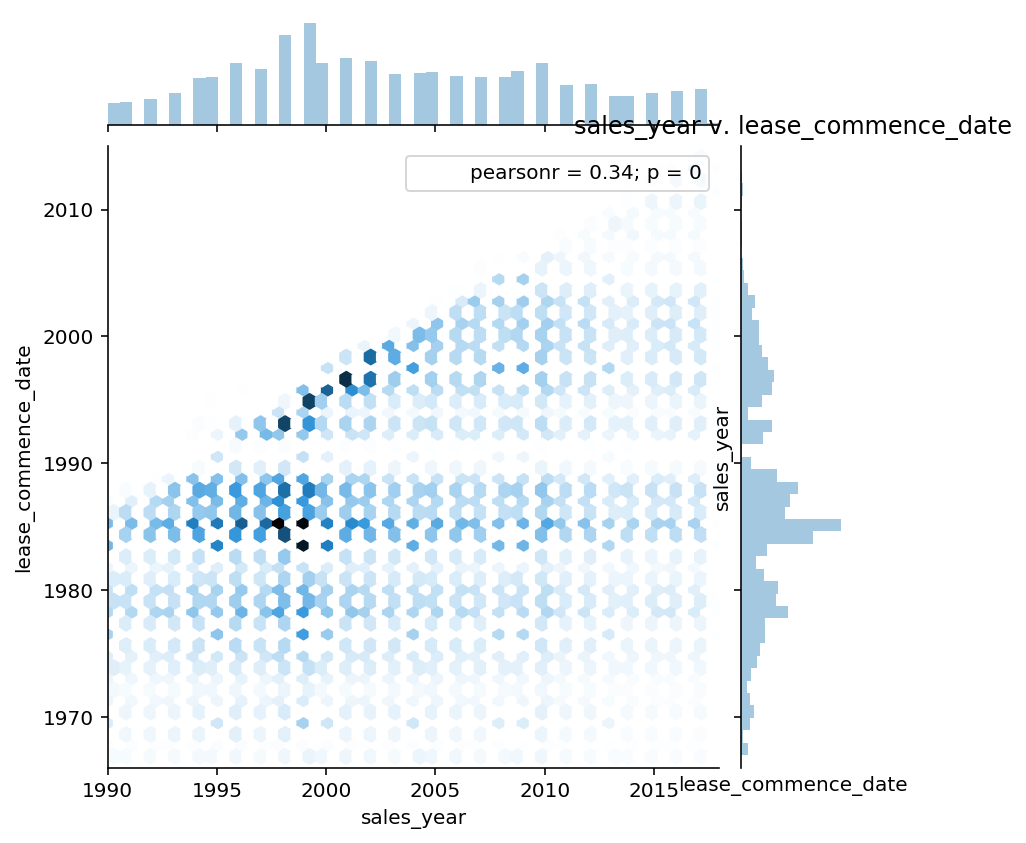

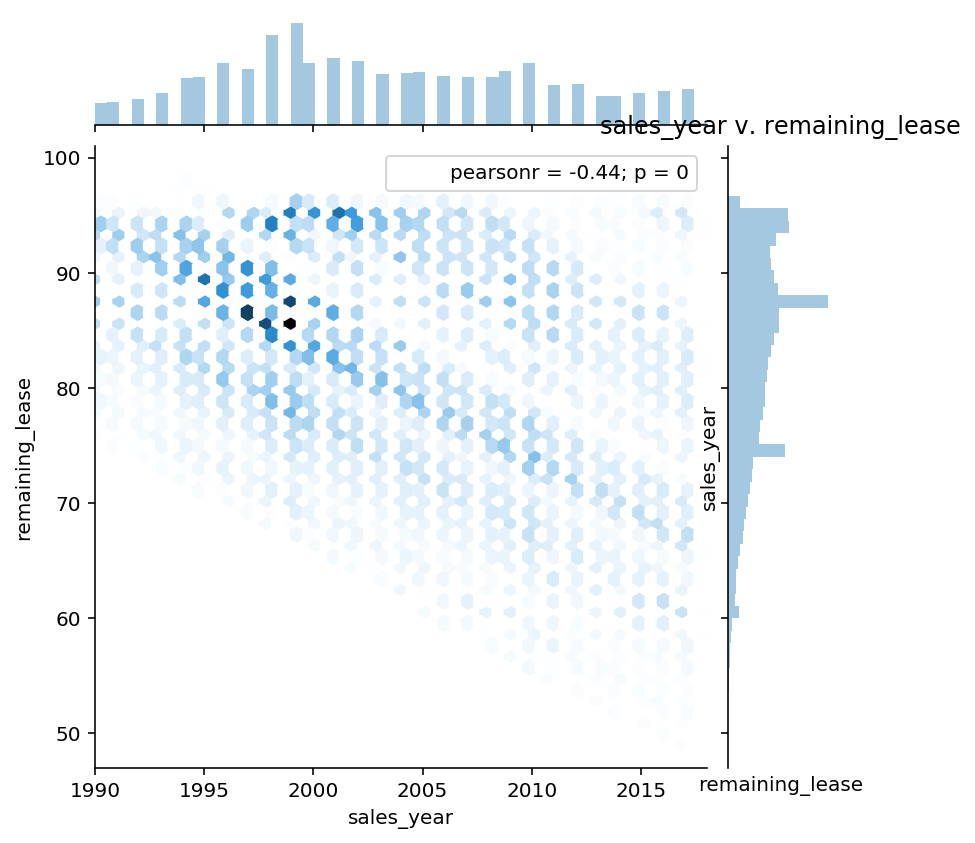

In [77]:
columns = np.array(['resale_price','floor_area_sqm','lease_commence_date','remaining_lease','sales_year'])

if ('sales_year' not in data.columns):
    data.insert(1,'sales_year',(pd.DatetimeIndex(data['month']).year))

if ('remaining_lease' not in data.columns):
    data['remaining_lease'] = 99 - (data.sales_year - data.lease_commence_date)
    
for i in range(0,len(columns)):
    inpt1 = columns[i] 
    x1 = data[inpt1]
    for j in range (i+1,len(columns)):
        inpt2 = columns[j]
        x2 = data[inpt2]
        sns.jointplot(data=data, x=x2, y=x1, kind='hex')
        plt.title('%s v. %s'%(inpt2,inpt1))
        plt.xlabel('%s'%inpt1)
        plt.ylabel('%s'%inpt2)
        if (inpt1 == 'resale_price'):
            plt.ylim(0,800000)
        elif (inpt1 == 'floor_area_sqm'):
            plt.ylim(40,200)
        plt.show()

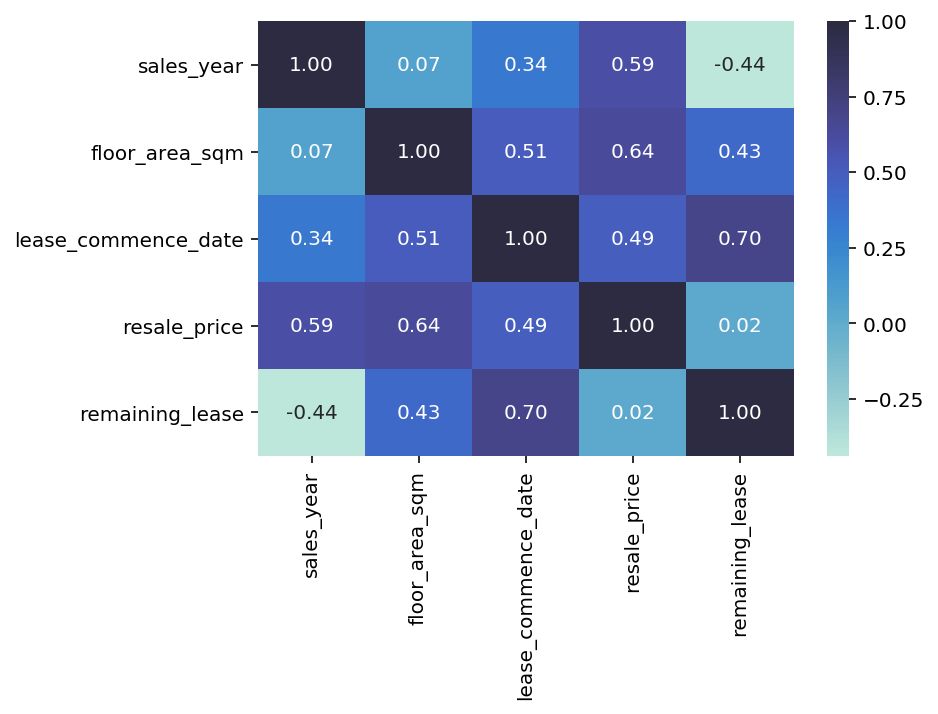

In [78]:
# Correlation heat map
sns.heatmap(data.corr(), annot=True, fmt=".2f",center=1.3)
plt.show()

Observations:
- !!! add text about apartment building policy !!!
- Floor_area has the strongest correlation to the resale_price (Pearson coefficient of 0.64), followed by sales_year (0.59) and then lease_commence_date (0.49).
- Correlations between input features vary between 0.071 and 0.7.

## 3 Cleaning and Preprocessing the Dataset
<hr>
After exploring the dataset, we came across the following points for preprocessing the data: 
- The feature month consists of sales year and month, e.g. 1990-01. To include the variable in the model, this variable will be seperated to a variable called sales year and a variable called month. 
- However, a linear regression will not be able to read the years, since it can see it as another numerical value. Therefore, the remaining lease year is calculated. Once the sales year variable is created, the remaining lease year can be computed by using the following formula: $remaining lease year = 99 - (sales year - lease commence date)$.
- Furthermore, there are rows containing characters. These rows (town, flat type, flat model and storey range) are transformed into dummy variables to clarify their levels, with other words, to quantify the qualitative data. <br>

### 3.1 Data Cleaning
During the exploration, there are some cleaning that should be performed. First, the flat types consist of eight types, which should be seven types instead. The flat type "Multi Generation" has a unique value with a space in between and one with a hyphen. Second, the flat models consist of 32 models, which should be 21 instead. This is also because of the capital usage. These doubles are removed by cleaning the data.


In [79]:
pd.options.mode.chained_assignment = None #SettingWithCopyWarning for confusing chained assignment disabled

#remove doubles
data['flat_type'][data['flat_type'] == 'MULTI-GENERATION'] = 'MULTI GENERATION'

#flat_type count
count_flat_type = data['flat_type'].nunique()
print("Total Flat Type Count:", count_flat_type)
flat_type_count = data['flat_type'].value_counts()
print("Flat Type \n" +str(flat_type_count))

Total Flat Type Count: 7
Flat Type 
4 ROOM              285136
3 ROOM              258482
5 ROOM              156260
EXECUTIVE            58177
2 ROOM                8859
1 ROOM                1246
MULTI GENERATION       469
Name: flat_type, dtype: int64


In [80]:
#remove doubles
data['flat_model'][data['flat_model'] == 'MODEL A'] = 'Model A'
data['flat_model'][data['flat_model'] == 'IMPROVED'] = 'Improved'
data['flat_model'][data['flat_model'] == 'NEW GENERATION'] = 'New Generation'
data['flat_model'][data['flat_model'] == 'PREMIUM APARTMENT'] = 'Premium Apartment'
data['flat_model'][data['flat_model'] == 'SIMPLIFIED'] = 'Simplified'
data['flat_model'][data['flat_model'] == 'STANDARD'] = 'Standard'
data['flat_model'][data['flat_model'] == 'APARTMENT'] = 'Apertment'
data['flat_model'][data['flat_model'] == 'MAISONETTE'] = 'Maisonette'
data['flat_model'][data['flat_model'] == 'ADJOINED FLAT'] = 'Adjoined flat'
data['flat_model'][data['flat_model'] == 'MODEL A-MAISONETTE'] = 'Model A-Maisonette'
data['flat_model'][data['flat_model'] == 'TERRACE'] = 'Terrace'
data['flat_model'][data['flat_model'] == 'MULTI GENERATION'] = 'Multi Generation'
data['flat_model'][data['flat_model'] == 'IMPROVED-MAISONETTE'] = 'Improved-Maisonette'
data['flat_model'][data['flat_model'] == '2-ROOM'] = '2-room'

#flat_model count
count_flat_model = data['flat_model'].nunique()
print("Total Flat Model Count:", count_flat_model)
flat_model_count = data['flat_model'].value_counts()
print("Flat Model Count \n" +str(flat_model_count))

Total Flat Model Count: 21
Flat Model Count 
Model A                   208633
Improved                  202602
New Generation            169643
Simplified                 51604
Standard                   38234
Premium Apartment          28886
Maisonette                 25136
Apartment                  19745
Apertment                   9901
Model A2                    8382
Adjoined flat               1913
Model A-Maisonette          1784
Terrace                      609
DBSS                         601
Multi Generation             469
Type S1                      183
Improved-Maisonette          105
Type S2                       80
Premium Maisonette            75
2-room                        38
Premium Apartment Loft         6
Name: flat_model, dtype: int64


### 3.2 Feature Engineering
In this part, we will explore new features that we can add to make our data more valuable. Since the data consists of seven objects, two floats and one integer, the seven objects will be researched and to see which can and will be changed. (Note that adding and dropping variables have been changed to comments, because an error would pop up otherwise. This is because the variable is already added or dropped, thus it cannot be performed again.)

In [84]:
#add sales year variable
if ('sales_year' not in data.columns):
    data.insert(1,'sales_year',(pd.DatetimeIndex(data['month']).year))

#add month2 variable
data.insert(1,'month2',(pd.DatetimeIndex(data['month']).month))

#remove month variable
data = data.drop('month',1)

#rename month2 variable
data = data.rename(columns = {'month2':'month'})

#compute remaining lease variable
if ('remaining_lease' not in data.columns):
    data['remaining_lease'] = 99 - (data.sales_year - data.lease_commence_date)

In [85]:
data.tail(5)

,month,sales_year,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
58626,1,2018,YISHUN,5 ROOM,760,YISHUN ST 72,07 TO 09,122.0,Improved,1987,490000.0,68
58627,1,2018,YISHUN,5 ROOM,876,YISHUN ST 81,04 TO 06,121.0,Improved,1987,468000.0,68
58628,1,2018,YISHUN,EXECUTIVE,792,YISHUN RING RD,07 TO 09,146.0,Maisonette,1987,555000.0,68
58629,1,2018,YISHUN,EXECUTIVE,387,YISHUN RING RD,04 TO 06,146.0,Maisonette,1988,550000.0,69
58630,1,2018,YISHUN,EXECUTIVE,277,YISHUN ST 22,07 TO 09,146.0,Maisonette,1985,545000.0,66


### 3.3 Create dummy variables
To use the string variables in the linear regression, dummies are made for the following features: town/area, flat type, flat model and storey range.

In [86]:
#add area variable
data.insert(1,'area',(data['town']))

In [87]:
#dummies for areas
data['area'][data.area == 'BUKIT MERAH'] = 1
data['area'][data.area == 'TOA PAYOH'] = 1
data['area'][data.area == 'QUEENSTOWN'] = 1
data['area'][data.area == 'GEYLANG'] = 1
data['area'][data.area == 'KALLANG/WHAMPOA'] = 1
data['area'][data.area == 'BISHAN'] = 1
data['area'][data.area == 'MARINE PARADE'] = 1
data['area'][data.area == 'CENTRAL AREA'] = 1
data['area'][data.area == 'BUKIT TIMAH'] = 1
data['area'][data.area == 'TAMPINES'] = 2
data['area'][data.area == 'YISHUN'] = 2
data['area'][data.area == 'BEDOK'] = 2
data['area'][data.area == 'PASIR RIS'] = 2
data['area'][data.area == 'JURONG WEST'] = 3
data['area'][data.area == 'BUKIT BATOK'] = 3
data['area'][data.area == 'CHOA CHU KANG'] = 3
data['area'][data.area == 'CLEMENTI'] = 3
data['area'][data.area == 'JURONG EAST'] = 3
data['area'][data.area == 'BUKIT PANJANG'] = 3
data['area'][data.area == 'WOODLANDS'] = 4
data['area'][data.area == 'SEMBAWANG'] = 4
data['area'][data.area == 'LIM CHU KANG'] = 4
data['area'][data.area == 'ANG MO KIO'] = 5
data['area'][data.area == 'HOUGANG'] = 5
data['area'][data.area == 'SERANGOON'] = 5
data['area'][data.area == 'SENGKANG'] = 5
data['area'][data.area == 'PUNGGOL'] = 5

area_count = data['area'].value_counts()
print("Area \n" +str(area_count))

#source: http://www.hdb.gov.sg/cs/infoweb/about-us/history/hdb-towns-your-home

Area 
2    215084
3    193490
1    160121
5    136074
4     63860
Name: area, dtype: int64


In [88]:
#dummies for flat types
data['flat_type'][data.flat_type == '1 ROOM'] = 1
data['flat_type'][data.flat_type == '2 ROOM'] = 2
data['flat_type'][data.flat_type == '3 ROOM'] = 3
data['flat_type'][data.flat_type == '4 ROOM'] = 4
data['flat_type'][data.flat_type == '5 ROOM'] = 5
data['flat_type'][data.flat_type == 'MULTI GENERATION'] = 6
data['flat_type'][data.flat_type == 'EXECUTIVE'] = 7

flat_type_count = data['flat_type'].value_counts()
print("Flat Type \n" +str(flat_type_count))

#source: http://www.hdb.gov.sg/cs/infoweb/residential/buying-a-flat/new/types-of-flats&rendermode=preview

Flat Type 
4    285136
3    258482
5    156260
7     58177
2      8859
1      1246
6       469
Name: flat_type, dtype: int64


In [89]:
#dummies for flat models
flat_model_array = np.unique(data['flat_model'])
n = len(flat_model_array)

for i in range(0,n):
    data['flat_model'][data['flat_model'] == flat_model_array[i]] = i

count_flat_model = data['flat_model'].nunique()
print("Total Flat Model Count:", count_flat_model)
flat_model_count = data['flat_model'].value_counts()
print("Flat Model Count \n" +str(flat_model_count))

Total Flat Model Count: 21
Flat Model Count 
8     208633
5     202602
12    169643
16     51604
17     38234
13     28886
7      25136
2      19745
3       9901
10      8382
1       1913
9       1784
18       609
4        601
11       469
19       183
6        105
20        80
15        75
0         38
14         6
Name: flat_model, dtype: int64


In [90]:
#dummies for storey ranges
storey_range_array = np.unique(data['storey_range'])
n = len(storey_range_array)

for i in range(0,n):
    data['storey_range'][data['storey_range'] == storey_range_array[i]] = i

#data['storey_range'][data.flat_type == '01 TO 03'] = 1
#data['storey_range'][data.flat_type == '01 TO 03'] = 2
#data['storey_range'][data.flat_type == '01 TO 03'] = 3

count_storey_range = data['storey_range'].nunique()
print("Total Storey Range Count:", count_storey_range)
storey_range_count = data['storey_range'].value_counts()
print("Storey Range Count \n" +str(storey_range_count))

Total Storey Range Count: 25
Storey Range Count 
2     196169
4     177012
0     158446
5     149470
7      46780
8      16906
10      8337
12      5233
1       2700
3       2474
13      2100
6       1259
15       788
9        265
16       151
18       151
20       148
11        92
21        73
14        39
23        11
22        11
19         7
24         5
17         2
Name: storey_range, dtype: int64


In [91]:
data.tail(10)

,month,area,sales_year,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
58621,1,2,2018,YISHUN,5,159,YISHUN ST 11,5,126.0,5,1985,477000.0,66
58622,1,2,2018,YISHUN,5,298,YISHUN ST 20,7,111.0,5,2000,487000.0,81
58623,1,2,2018,YISHUN,5,229,YISHUN ST 21,2,121.0,5,1985,410000.0,66
58624,1,2,2018,YISHUN,5,212,YISHUN ST 21,0,121.0,5,1985,440000.0,66
58625,1,2,2018,YISHUN,5,607,YISHUN ST 61,4,121.0,5,1987,473800.0,68
58626,1,2,2018,YISHUN,5,760,YISHUN ST 72,4,122.0,5,1987,490000.0,68
58627,1,2,2018,YISHUN,5,876,YISHUN ST 81,2,121.0,5,1987,468000.0,68
58628,1,2,2018,YISHUN,7,792,YISHUN RING RD,4,146.0,7,1987,555000.0,68
58629,1,2,2018,YISHUN,7,387,YISHUN RING RD,2,146.0,7,1988,550000.0,69
58630,1,2,2018,YISHUN,7,277,YISHUN ST 22,4,146.0,7,1985,545000.0,66


To check whether the remaining lease variable is correct, the data tail from dataset 5 in the data acquisition is used to compare with the new data. Since only the fifth data set consists of this data, we could use the column for validation. 

### 3.4 Variables

The variables considered in the research will be: <br>
$x_1$ Remaining lease year <br>
$x_2$ Floor area squared meters <br>
$D_3$ Town and/or Area <br>
$D_4$ Flat type <br>
$D_5$ Flat model <br>
$D_6$ Storey range <br>
$x_7$ Month <br>
$Y$ Resale price <br>

In [92]:
#remove unnecessary variables
#data = data.drop('town',1)
#data = data.drop('block',1)
#data = data.drop('street_name',1)

## 4 Data Analysis
<hr>
This part of the report will show algorithms that have been applied to predict the housing prices. We have focused on regressions with different features. <br>

### 4.1 Preparing the data

In [93]:
# Prepare data
data_input = data[['floor_area_sqm','sales_year','lease_commence_date','flat_type','area','month','flat_model','storey_range']]
data_output = data['resale_price']
x_train, x_test, y_train, y_test = train_test_split(data_input, data_output, test_size=0.33, random_state=42)
print('Our train data contains',x_train.shape[0],'entries.')
print('Our test data contains',x_test.shape[0],'entries.')



Our train data contains 514981 entries.
Our test data contains 253648 entries.


In [96]:
# Run Forest Run
model_Forest = RandomForestRegressor()
model_Forest.fit(x_train, y_train)
y_pred_f = model_Forest.predict(x_test)
y_pred_f_train = model_Forest.predict(x_train)
mae_f = mean_absolute_error(y_test, y_pred_f)
mae_f_train = mean_absolute_error(y_train, y_pred_f_train)
print("Mean Absolute Error for Random Forrest, including all available features, is: %.0f" % mae_f)
print("For the train set: %.0f" % mae_f_train)

Mean Absolute Error for Random Forrest, including all available features, is: 19760
For the train set: 9297


In [99]:
# Run Linear Regression
model_lin_reg = LinearRegression()
model_lin_reg.fit(x_train, y_train)
y_pred_l = model_lin_reg.predict(x_test)
y_pred_l_train = model_Forest.predict(x_train)
mae_l = mean_absolute_error(y_test, y_pred_l)
mae_l_train = mean_absolute_error(y_train, y_pred_l_train)
print("\nMean Absolute Error for Linear Regression, including all available features, is: %.0f" %mae_l)
print("For the train set: %.0f" % mae_l_train)


Mean Absolute Error for Linear Regression, including all available features, is: 53969
For the train set: 9297


In [52]:
# Run AdaBoost
model_abr = AdaBoostRegressor()
model_abr.fit(x_train, y_train)
y_pred_abr = model_abr.predict(x_test)
mae_abr = mean_absolute_error(y_test, y_pred_abr)
print("\nMean Absolute Error for AdaBoost, including all available features, is: %.0f" %mae_abr)


Mean Absolute Error for AdaBoost, including all available features, is: 72746


In [53]:
# Run GradientBoostingRegressor
model_gbr = GradientBoostingRegressor()
model_gbr.fit(x_train, y_train)
y_pred_gbr = model_gbr.predict(x_test)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
print("\nMean Absolute Error for GradientBoostingRegressor, including all available features, is: %.0f" %mae_gbr)


Mean Absolute Error for GradientBoostingRegressor, including all available features, is: 26829


In [55]:
# changing the features:
# sqm_year_lcd
sqm_year_lcd = data[['floor_area_sqm','sales_year','lease_commence_date']]
x_train, x_test, y_train, y_test = train_test_split(sqm_year_lcd, data_output, test_size=0.33, random_state=42)
model_Forest.fit(x_train, y_train)
y_pred_f = model_Forest.predict(x_test)
mae_f = mean_absolute_error(y_test, y_pred_f)
print("MAE with RF for SQM, sales year, lease date: %.0f" % mae_f)

# sqm_year_lcd_ft
sqm_year_lcd_ft = data[['floor_area_sqm','sales_year','lease_commence_date','flat_type','resale_price']]
x_train, x_test, y_train, y_test = train_test_split(sqm_year_lcd_ft, data_output, test_size=0.33, random_state=42)
model_Forest.fit(x_train, y_train)
y_pred_f = model_Forest.predict(x_test)
mae_f = mean_absolute_error(y_test, y_pred_f)
print("MAE with RF for SQM, sales year, lease date, flat type: %.5f" % mae_f)

# sqm_year_lcd_a
sqm_year_lcd_a = data[['floor_area_sqm','sales_year','lease_commence_date','area','resale_price']]
x_train, x_test, y_train, y_test = train_test_split(sqm_year_lcd_a, data_output, test_size=0.33, random_state=42)
model_Forest.fit(x_train, y_train)
y_pred_f = model_Forest.predict(x_test)
mae_f = mean_absolute_error(y_test, y_pred_f)
print("MAE with RF for SQM, sales year, lease date, area: %.5f" % mae_f)

MAE with RF for SQM, sales year, lease date: 29635
MAE with RF for SQM, sales year, lease date, flat type: 1.32550
MAE with RF for SQM, sales year, lease date, area: 1.28659
